# **SW02: Bias-variation tradeoff**

You are maybe familiar with the terms bias and variance from statistics:
- The **bias** is a systematic error that leads to a consistent deviation of the estimate from the true value.
- The **variance** is a measure of dispersion (or variability) in a set of data.

In machine learning, bias and variance describe properties of a trained model:
- The **bias** is a property of the model that causes it to miss relevant 
relations between the features and the target output, e.g. because of wrong 
assumptions in the model.
- The **variance** measures how suceptible the model is to small changes in the 
training data. A model with high variance will change a lot if the training 
data is changed slightly.

As a rule of thumb, we can gradually reduce the bias of a model by 
increasing its complexity, but this will also increase its variance. 
The goal is to find a good balance between bias and variance.

In this notebook, we will explore the bias-variance tradeoff at the hand of 
different classifiers. As in the previous notebook, dont worry if you don't 
understand everything in detail, yet. 

---



In [1]:
# Basic imports
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt

# Import scikit-learn functionality
from sklearn.preprocessing import (PolynomialFeatures,
                                   StandardScaler)
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import make_pipeline
from sklearn.metrics import (mean_squared_error, 
                             r2_score)

# Some Jupyter magic for nicer output
%config InlineBackend.figure_formats = ["svg"]   # Enable vectorized graphics

import sys
sys.path.append("..")
import ml

In [2]:
# Specify some global plotting parameters.
import matplotlib as mpl
#mpl.rcParams['figure.figsize'] = (5, 4)
#mpl.rcParams['figure.dpi'] = 300
mpl.rcParams['axes.grid'] = True
#mpl.rcParams['axes.labelsize'] = 8
mpl.rcParams['axes.labelweight'] = "bold"
mpl.rcParams['grid.linestyle'] = '-'
mpl.rcParams['grid.alpha'] = 0.4
mpl.rcParams['legend.facecolor'] = [1,1,1]
mpl.rcParams['legend.framealpha'] = 0.75
mpl.rcParams['lines.linewidth'] = 1
mpl.rcParams['xtick.top'] = True
mpl.rcParams['ytick.right'] = True

# Deafult line width: 2
mpl.rcParams['lines.linewidth'] = 2

---

## **Example: Regression**
In a regression problem, we are trying to predict a continuous value
from a set of input features. In this first example, we will generate
a simple dataset with a single feature and a single target variable, 
and then fit a polynomial regression model to it:

$y(x) = a_0 + a_1 x + a_2 x^2 + ... + a_n x^n$

By including higher-order terms in the model, we can fit more complex
relationships between the input and output variables. As a result,
we can reduce the bias of the model, but at the cost of increasing
its variance. Let's see how this works in practice.

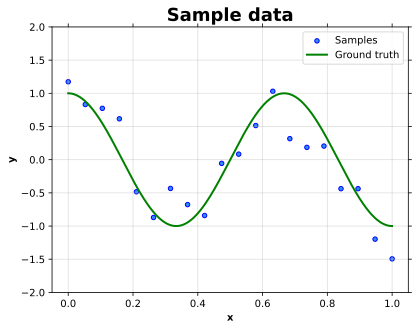

In [3]:
def fun_true(X):
    """The true function we want use to generate the data."""
    return np.cos(3 * np.pi * X)

def sample_data(n_samples=20, noise=0.35):
    """Generate a synthetic dataset."""
    np.random.seed(42)
    #X = np.sort(np.random.rand(n_samples))  # Randomly spaced samples
    X = np.linspace(0, 1, n_samples)        # Equally spaced samples (better)
    y = fun_true(X) + np.random.randn(n_samples) * noise
    X = X[:, np.newaxis]
    return X, y

def plot_sample_data(X, y):
    """Plot the data."""
    X_p = np.linspace(0, 1, 1000)
    y_p = fun_true(X_p)
    plt.scatter(X, y, edgecolor='b', s=20, label="Samples")
    plt.plot(X_p, y_p, color='g', label="Ground truth")
    plt.xlabel("x")
    plt.ylabel("y")
    plt.ylim(-2, 2)
    plt.legend(loc="best")
    plt.title("Sample data", fontsize=18, fontweight='bold')
    plt.show()
    
X, y = sample_data()
plot_sample_data(X, y)

For this sample data, let's try to fit a polynomial. Here, we use scikit-learn's 
[`PolynomialFeatures`](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.PolynomialFeatures.html) 
transformer to generate polynomial features up to a certain degree $d$:
$$x \rightarrow [1, x, x^2, x^3, \ldots, x^d]$$



In [4]:
# Small test: See how the transformation works for some simple data.
X_demo = np.arange(5).reshape(-1, 1)
X_trafo = PolynomialFeatures(degree=3).fit_transform(X_demo)

print("Original samples:")
print(X_demo)

print("Transformed samples:")
print(X_trafo)

Original samples:
[[0]
 [1]
 [2]
 [3]
 [4]]
Transformed samples:
[[ 1.  0.  0.  0.]
 [ 1.  1.  1.  1.]
 [ 1.  2.  4.  8.]
 [ 1.  3.  9. 27.]
 [ 1.  4. 16. 64.]]


In [5]:
########################
###    EXERCISE 1    ###
########################

# If X is a feature vector of length n, what is the shape of the transformed 
# feature vector after applying the polynomial transformation of degree d=4?

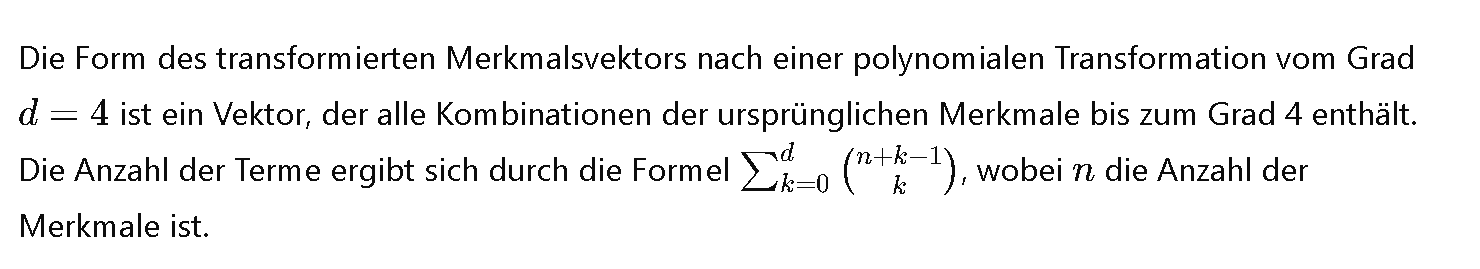

We can then use the polynomial features to fit a linear regression model. This 
results in a polynomial regression model!

$$
\begin{align}
X & \mapsto [1, X, X^2, X^3, \ldots, X^d] = X_t\\
y &= f(X_t) = a_0 + a_1 X + a_2 X^2 + a_3 X^3 + \ldots + a_n X^d
\end{align}
$$

Given some training data, we can train the regression parameters $a_i$. See [`LogisticRegression`](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html):

(20,)
(20, 1)


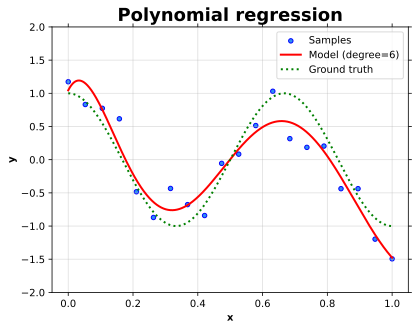

In [10]:
# Degree of the polynomial
d = 6

# Compute the polynomial features
trafo = PolynomialFeatures(degree=d)
trafo.fit(X)
X_trafo = trafo.transform(X)

# This can be done in one step as well...
# X_trafo = PolynomialFeatures(degree=d).fit_transform(X_demo)
print(y.shape)
print(X.shape)

# Create a linear regression model.
model = LinearRegression()
model.fit(X_trafo, y)

# Make predictions.
X_p = np.linspace(0, 1, 1000).reshape(-1, 1)
X_p_trafo = trafo.transform(X_p)
y_p = model.predict(X_p_trafo)

# Let's visualize everything.
plt.scatter(X, y, edgecolor='b', s=20, label="Samples")
plt.plot(X_p, y_p, color='r', label="Model (degree=%d)" % d)
plt.plot(X_p, fun_true(X_p), color='g', ls=":", label="Ground truth")
plt.ylim(-2, 2)
plt.xlabel("x")
plt.ylabel("y")
plt.legend(loc="best")
plt.title("Polynomial regression", fontsize=18, fontweight='bold')
plt.show()


Note that we can simplify the code by using a [pipeline](https://scikit-learn.org/stable/modules/compose.html)! This is a very powerful concept in scikit-learn that allows us to chain multiple operations together. In this case, we chain the polynomial transformation and the linear regression model together. This way, we can call fit and predict on the pipeline object directly without having to worry about the intermediate steps. In addition, we wrap everything into a function, as this will be useful later:

In [7]:

def train_model(X_train, y_train, d=3):
    """Train a polynomial regression model."""
    model = make_pipeline(PolynomialFeatures(degree=d),  # Step 1: Polynomial transformation
                          LinearRegression())            # Step 2: Linear regression
    model.fit(X_train, y_train)
    return model

d = 3
model = train_model(X, y, d=d)
y_p = model.predict(X_p)

In [8]:
########################
###    EXERCISE 2    ###
########################

# Play around with the degree of the polynomial and see how the model changes.
# What happens if you set the degree to 1? What if you set it to 20?
# Explain the results.

#Solution: - At degree one the regression changes to a linear line and the model is not really precise.
#- At degree 20 there is overfitting so the line is very unsimilar and it skyrockets on different points. 

---

Let's see what happens if we increase the model complexity (= degree of the polynomial).
To compare the models, we will use the Mean Squared Error (MSE) and the $R^2$ score.

The MSE is defined as the squared difference between the true ($y_i$) and predicted values ($\hat{y}_i$), averaged over all $n$ samples:
$$MSE = \frac{1}{n} \sum_{i=1}^n (y_i - \hat{y}_{i})^2$$

The $R^2$, or the [coefficient of determination](https://en.wikipedia.org/wiki/Coefficient_of_determination), is another very common performance measure for regression models. 
In scikit-learn, it is the default metric for regression models. It is defined as follows:
$$R^2 = 1 - \frac{\sum_i (y_i - \hat{y}_i)^2}{\sum_i (y_i - \bar{y})^2}$$

We will encounter these measures again when we study regression models in more detail. For now, just remember that a lower MSE and a higher $R^2$ score are better, and we can use 
them to compare different models.

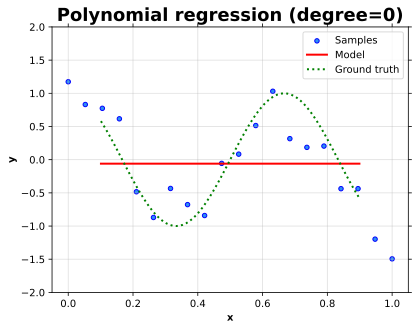

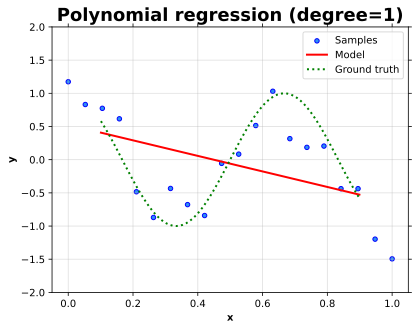

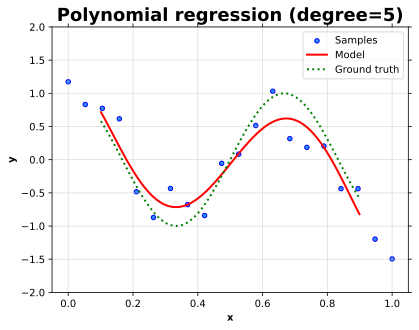

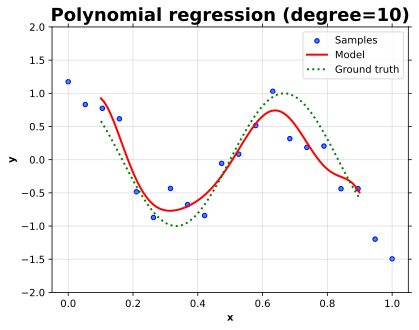

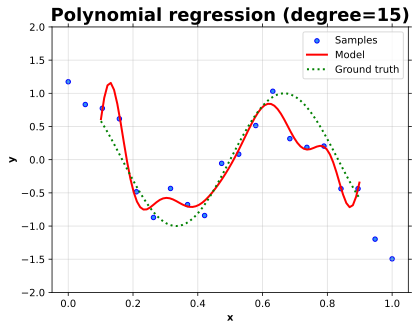

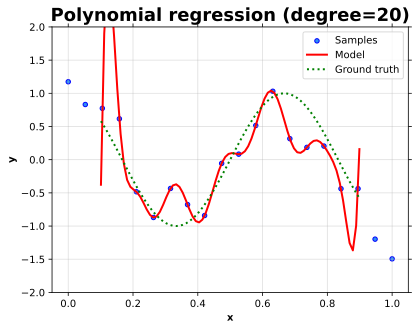

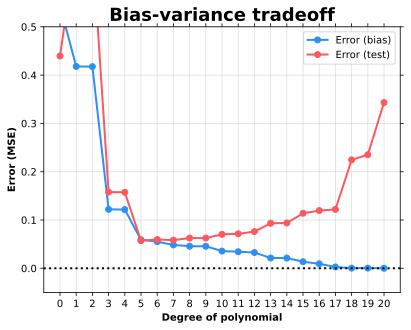

In [11]:
# Create new test data
X_train, y_train = sample_data(n_samples=20)    # Data used for training
yt_train = fun_true(X_train)                    # Ground truth values for training data

X_test, y_test = sample_data(n_samples=100)      # Data used for testing

# Detail: Let's clip the test data, as the 
# polynomials tend to explode at the edges.
if True:
    mask = ((X_test > 0.1) & (X_test < 0.9)).ravel()
    X_test = X_test[mask]
    y_test = y_test[mask]
yt_test = fun_true(X_test)                       # Ground truth values for test data

# score_func = r2_score
# score_name = "$R^2$"
score_func = mean_squared_error
score_name = "MSE"

scores_bias = []
scores_test = []
ds = np.arange(0, 21)
for i, d in enumerate(ds):
    model = train_model(X_train, y_train, d=d)
    
    yp_train = model.predict(X_train)
    yp_test = model.predict(X_test)
    
    score_bias = score_func(y_true=y_train, y_pred=yp_train)
    score_test = score_func(y_true=yt_test, y_pred=yp_test)
    scores_bias.append(score_bias)
    scores_test.append(score_test)
    
    if (d % 5) == 0 or (d < 2):
        plt.figure()
        plt.scatter(X_train, y_train, edgecolor='b', s=20, label="Samples")
        plt.plot(X_test, yp_test, color='r', label="Model")
        plt.plot(X_test, yt_test, color='g', label="Ground truth", ls=":")
        plt.ylim(-2, 2)
        plt.xlabel("x")
        plt.ylabel("y")
        plt.legend(loc="best")
        plt.title("Polynomial regression (degree=%d)" % d, 
                  fontsize=18, fontweight='bold')
        plt.show()
        

    
plt.plot(ds, scores_bias, marker='o', label="Error (bias)")
plt.plot(ds, scores_test, marker='o', label="Error (test)")
plt.xlabel("Degree of polynomial")
plt.ylabel("Error (%s)" % score_name)
plt.title("Bias-variance tradeoff", 
          fontsize=18, fontweight='bold')
plt.legend(loc="best")
plt.xticks(ds);
# set ylim:
plt.ylim(-0.05, 0.5)
plt.axhline(0., color="k", ls=":");

In [10]:
########################
###    EXERCISE 3    ###
########################

# What can you read about the bias-variance trade-off from the plot above? the higher the polynom the lower the bias error and the higher the error of the test and when both is very low the bias and test error are not ideal
# What is the optimal degree of the polynomial for this dataset? The optimal degree is 5, because it's an almost perfect overlap of error bias and error test on a very low point